In [58]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from rdkit import Chem
import numpy as np
import mols2grid
from rdkit.Chem import QED
import glob

import mols2grid
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit.Chem import AllChem, DataStructs

from sklearn.utils import compute_sample_weight
import numpy as np
from collections import Counter
from rdkit.Chem import QED
import scikit_posthocs as sp
from tqdm.auto import tqdm
import json
import joblib

import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs

from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from collections import Counter

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from rdkit import Chem
from rdkit.Chem import Draw

In [2]:
X_train = pd.read_parquet(r'x_train_6618') # I have deleted all _5k s, e.g. X_train_5k to X_train
y_train = pd.read_csv(r'y_train_6618.csv')
descriptors = list(X_train.columns)
# optimized hyperparameters
with open(r'optuna_results_6618.json', 'r') as file:
    hyperparameters = json.load(file)
best_params_dict = {
    model: {'best_params': values['best_params']}
    for model, values in hyperparameters.items()
}    
    

In [3]:
X_test =  pd.read_parquet(r'x_test_6618')
y_test = pd.read_csv(r'y_test_6618.csv')

In [4]:
initial_data = pd.read_csv(r'5k data small molecules and drugs.csv', index_col =0)
y_train['phase'] = y_train['phase'].apply(lambda x: int(x/4))
y_test['phase'] = y_test['phase'].apply(lambda x: int(x/4))


In [96]:
initial_data[initial_data['phase']==4]

,SMILES,phase
0,O=C(c1ccc(NS(=O)(=O)c2cccc3cccnc23)cc1)N1CCN(C...,4
1,CC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@](C)(O)...,4
2,COc1ccc(-n2nccn2)c(C(=O)N2CCC[C@@]2(C)c2nc3ccc...,4
3,CCCS(=O)(=O)N[C@H]1C[C@@H](N(C)c2ncnc3[nH]ccc2...,4
4,O[C@@](Cn1cnnn1)(c1ccc(F)cc1F)C(F)(F)c1ccc(-c2...,4
...,...,...
1483,C[C@@H](OC[C@@]1(c2ccccc2)CC[C@]2(CCC(=O)N2)CN...,4
1484,CC(C)(NC(=O)C1=C(O)[C@@H]2Oc3c(O)ccc4c3[C@@]23...,4
1485,OC[C@H]1NC[C@H](O)[C@@H](O)[C@H]1O,4
1486,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(cc(O...,4


In [ ]:
#BCUT analysis

In [102]:
drugs_bcut = list(X_test.iloc[X_test.index<1488]['BCUTd-1l']) + list(X_train.iloc[X_train.index<1488]['BCUTd-1l'])

In [103]:
non_drugs_bcut = list(X_test.iloc[X_test.index>1488]['BCUTd-1l']) + list(X_train.iloc[X_train.index>1488]['BCUTd-1l'])

In [127]:
aa = [ i for i in drugs_bcut if i <1.5]
bb = [ i for i in non_drugs_bcut if i <1.5]

(array([1.588e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 5.540e+02, 9.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.900e+01, 7.200e+01, 3.420e+02, 7.450e+02,
        4.800e+01, 1.550e+03, 1.000e+00, 0.000e+00, 2.000e+00, 4.340e+02,
        7.640e+02, 3.200e+01, 2.790e+02, 1.270e+02]),
 array([0.91054085, 0.91267613, 0.91481141, 0.91694668, 0.91908196,
        0.92121724, 0.92335252, 0.9254878 , 0.92762308, 0.92975836,
        0.93189363, 0.93402891, 0.93616419, 0.93829947, 0.94043475,
        0.94257003, 0.94470531, 0.94684058, 0.94897586, 0.95111114,
        0.95324642, 0.9553817 , 0.95751698, 0.95965226, 0.96178753,
        0.96392281, 0.96605809, 0.96819337, 0.97032865, 0.97246393,
        0.9745992 , 0.97673448, 0.97886976, 0.98100504, 0.98314032,
        0.9852756 , 0.9874

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

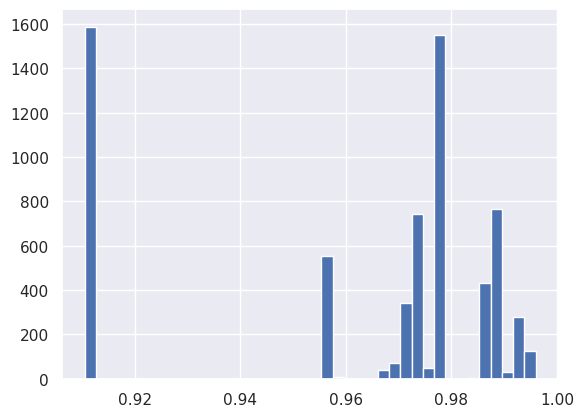

In [128]:
plt.hist(bb, bins = 40)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         65.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  33.,   0.,
          5., 192., 348., 528.,   2., 206., 100.]),
 array([0.80633193, 0.81107229, 0.81581265, 0.82055301, 0.82529337,
        0.83003373, 0.83477409, 0.83951444, 0.8442548 , 0.84899516,
        0.85373552, 0.85847588, 0.86321624, 0.8679566 , 0.87269696,
        0.87743732, 0.88217768, 0.88691804, 0.89165839, 0.89639875,
        0.90113911, 0.90587947, 0.91061983, 0.91536019, 0.92010055,
        0.92484091, 0.92958127, 0.93432163, 0.93906198, 0.94380234,
        0.9485427 , 0.95328306, 0.95802342, 0.96276378, 0.96750414,
        0.9722445 , 0.97698486, 0.98172522, 0.98646558, 0.99120593,
        0.99594629]),
 <BarContainer object of 40 artists>)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

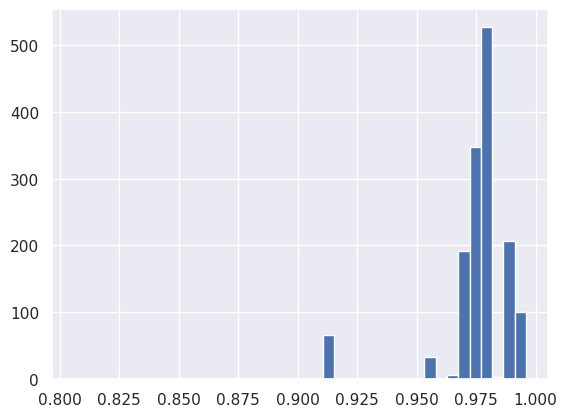

In [126]:
plt.hist(aa, bins = 40)

<Axes: >

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


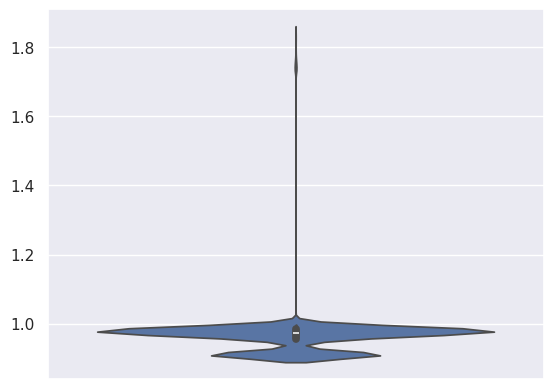

In [129]:
sns.violinplot(non_drugs_bcut)

<Axes: >

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

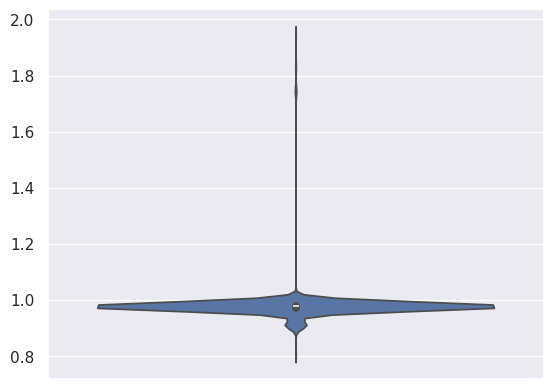

In [130]:
sns.violinplot(drugs_bcut)

In [118]:
np.mean(non_drugs_bcut) , np.mean(drugs_bcut)

(0.9654191904570117, 0.9789369851161435)

In [119]:
np.std(non_drugs_bcut) , np.std(drugs_bcut)

(0.061709301196509, 0.0620363360846729)

In [121]:
from scipy.stats import skew

In [123]:
skew(non_drugs_bcut), skew(drugs_bcut)

(9.655828095278652, 12.272332304148964)

In [120]:
np.sqew(non_drugs_bcut)

AttributeError: module 'numpy' has no attribute 'sqew'

(array([1.588e+03, 3.360e+03, 1.638e+03, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.300e+01, 4.000e+00,
        3.000e+00]),
 array([0.91054085, 0.9476718 , 0.98480275, 1.0219337 , 1.05906465,
        1.09619561, 1.13332656, 1.17045751, 1.20758846, 1.24471941,
        1.28185036, 1.31898131, 1.35611227, 1.39324322, 1.43037417,
        1.46750512, 1.50463607, 1.54176702, 1.57889798, 1.61602893,
        1.65315988, 1.69029083, 1.72742178, 1.76455273, 1.80168368,
        1.83881464]),
 <BarContainer object of 25 artists>)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

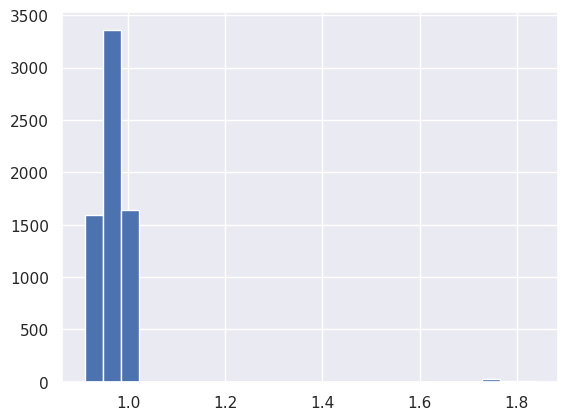

In [116]:
plt.hist(non_drugs_bcut, bins = 25)


<Axes: >

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

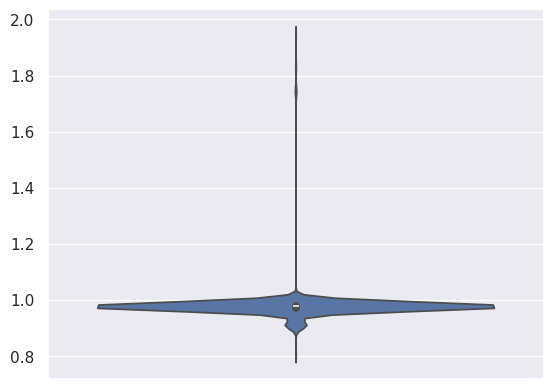

In [107]:
sns.violinplot(drugs_bcut)

In [75]:
dffdfdfdf = initial_data.iloc[X_test.index].reset_index(drop = True)


In [79]:
smi_gen_test = list(dffdfdfdf[dffdfdfdf['phase']==4]['SMILES'].sample(30))

In [81]:
smi_gen_test0 = list(dffdfdfdf[dffdfdfdf['phase']==0]['SMILES'].sample(30))

In [83]:
smis = smi_gen_test + smi_gen_test0

In [85]:
labels = [1]*30+[0]*30

In [89]:
ddf = pd.DataFrame(zip(smis,labels), columns = ['SMILES','labels'])
ddf.to_csv('molecules_for_BCUT_analysis.csv', index = False)

In [88]:
mols2grid.display(ddf, smiles_col = 'SMILES')

MolGridWidget()

In [82]:
mols2grid.display([Chem.MolFromSmiles(i) for i in smi_gen_test0 ])

MolGridWidget()

In [80]:
mols2grid.display([Chem.MolFromSmiles(i) for i in smi_gen_test ])

MolGridWidget()

In [131]:
import numpy as np
import matplotlib.pyplot as plt

# Your predict_ensemble function
def predict_ensemble(models_dict, new_test_set):
    prob_preds = [model.predict_proba(new_test_set)[:, 1] for model in models_dict.values()]
    final_pred_prob = np.mean(prob_preds, axis=0)
    return final_pred_prob

# Inputs:
# models_dict: dict of trained models in your ensemble
# X: full feature matrix (Pandas DataFrame)
# y: true labels
# BCUTd-1l: feature name to modify

# Parameters
num_items = 20
feature_name_to_change = 'BCUTd-1l'  # Name of the feature to change
X_selected = X_test[:num_items].copy()  # Select first 20 items
y_selected = y_test[:num_items]

# Get the index of the feature 'BCUTd-1l' in the feature matrix
feature_to_change_idx = X_selected.columns.get_loc(feature_name_to_change)

# Define the feature value range
value_range = np.linspace(0, 2, 21)

# Store prediction probabilities for each item and feature value
all_probs = []

for i in range(num_items):
    probs_for_item = []
    for val in value_range:
        X_modified = X_selected.copy()
        X_modified.iloc[i, feature_to_change_idx] = val  # Change the feature value for item i
        
        # Get ensemble predicted probabilities for modified dataset
        pred_probs = predict_ensemble(models_dict, X_modified)
        
        # Store the predicted probability for the specific item i
        probs_for_item.append(pred_probs[i])
    
    all_probs.append(probs_for_item)

all_probs = np.array(all_probs)

# Plotting
plt.figure(figsize=(12, 7))
for i in range(num_items):
    plt.plot(value_range, all_probs[i], label=f'Item {i+1}')

plt.xlabel('Feature Value (BCUTd-1l)')
plt.ylabel('Predicted Probability (Positive Class)')
plt.title(f'Effect of Changing BCUTd-1l on Ensemble Predictions for 20 Items')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.show()


NameError: name 'models_dict' is not defined

In [5]:
SMILES_train_set = list(initial_data.iloc[X_train.index]['SMILES'])
SMILES_test_set = list(initial_data.iloc[X_test.index]['SMILES'])


Dataset analysis

In [14]:
# Convert RDKit fingerprint to binary numpy array
def fp_to_array(fp):
    arr = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

# Generate all fingerprints and convert to bit arrays
def get_fp_matrix(molecules):
    fps = [get_maccs_fingerprint(mol) for mol in molecules]
    bit_vectors = np.array([fp_to_array(fp) for fp in fps], dtype=np.float32)
    return bit_vectors

# Generate MACCS keys fingerprint
def get_maccs_fingerprint(mol):
    return AllChem.GetMACCSKeysFingerprint(mol)

# Compute pairwise Tanimoto similarity using PyTorch on GPU
def compute_tanimoto_gpu(fp_matrix_np):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    X = torch.tensor(fp_matrix_np, device=device)
    dot_product = torch.mm(X, X.T)
    sum_x = X.sum(dim=1).view(-1, 1)
    denominator = sum_x + sum_x.T - dot_product
    similarity = dot_product / denominator.clamp(min=1e-6)
    return similarity.cpu().numpy()

# Compute average similarity from upper triangle
def average_tanimoto_similarity(sim_matrix):
    upper_indices = np.triu_indices_from(sim_matrix, k=1)
    return np.mean(sim_matrix[upper_indices])

# Plot and save similarity heatmap
def plot_similarity_heatmap(similarity_matrix, filename=None):
    similarity_df = pd.DataFrame(similarity_matrix)
    
    # Set font to Arial
    plt.rcParams['font.family'] = 'Arial'
    sns.set(font='Arial')

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(similarity_df, annot=False, cmap="coolwarm", cbar_kws={'label': 'Tanimoto Similarity'})

    # Save as TIFF image (if filename is provided)
    if filename:
        plt.savefig(filename, format='tiff', dpi=300, bbox_inches='tight')

    # Display the plot
    plt.show()

# Main function to process SMILES and visualize the results
def process_and_visualize_smiles(smiles_set, output_filename=None):
    molecules = [Chem.MolFromSmiles(smi) for smi in smiles_set]
    fp_matrix_np = get_fp_matrix(molecules)
    
    # Compute Similarity Matrix on GPU
    similarity_matrix = compute_tanimoto_gpu(fp_matrix_np)
    
    # Plot and optionally save the heatmap
    plot_similarity_heatmap(similarity_matrix, output_filename)
    
    # Print Mean Similarity
    print("Mean Tanimoto similarity:", average_tanimoto_similarity(similarity_matrix))

In [46]:
phase_data = pd.read_csv(r'Clinical candidates dataset.csv')


In [49]:
#process_and_visualize_smiles(SMILES_train_set)
#process_and_visualize_smiles(SMILES_test_set)
#process_and_visualize_smiles(phase_data[phase_data['phase']==3]['SMILES'])
#process_and_visualize_smiles(phase_data[phase_data['phase']==2]['SMILES'])
#process_and_visualize_smiles(phase_data[phase_data['phase']==1]['SMILES'])

In [55]:
def get_scaffold_smiles(mol):
    """Return the canonical SMILES of the Murcko scaffold for a molecule."""
    scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    if scaffold is not None:
        return Chem.MolToSmiles(scaffold, isomericSmiles=True)
    else:
        return None

def calculate_scaffold_frequencies(molecules):
    """Calculate frequencies of scaffolds in a list of molecules."""
    scaffold_smiles = []
    for mol in molecules:
        if mol is not None:
            smi = get_scaffold_smiles(mol)
            if smi:
                scaffold_smiles.append(smi)
    return Counter(scaffold_smiles)





In [57]:
#example of scaffold frequency calculation for trainning set molecules
calculate_scaffold_frequencies([Chem.MolFromSmiles(smi) for smi in SMILES_train_set])

Counter({'c1ccccc1': 830,
         'c1ccncc1': 102,
         'c1ccc2ccccc2c1': 39,
         'C1CCNCC1': 36,
         'c1ccc2ncccc2c1': 34,
         'c1ccc2[nH]ccc2c1': 31,
         'C1CCNC1': 31,
         'C1CCCCC1': 19,
         'C1CNCCN1': 15,
         'c1c[nH]cn1': 15,
         'O=c1ccc2ccccc2o1': 14,
         'C1CCOC1': 14,
         'c1ccc(Cc2ccccc2)cc1': 13,
         'C1CCCC1': 13,
         'c1ccc2[nH]cnc2c1': 11,
         'C1COCCN1': 10,
         'c1cnccn1': 9,
         'O=C(Nc1ccccc1)c1ccccc1': 9,
         'c1ccc(COc2ccccc2)cc1': 9,
         'C1CC1': 9,
         'c1ccc2c(c1)Nc1ccccc1S2': 8,
         'c1ccoc1': 8,
         'C1CCOCC1': 8,
         'c1ccsc1': 8,
         'C1CCC1': 8,
         'c1cncnc1': 8,
         'O=C1CCCN1': 8,
         'c1ccc(Oc2ccccc2)cc1': 8,
         'c1cn[nH]c1': 8,
         'O=C(c1ccccc1)c1ccccc1': 8,
         'c1ccc(-c2ccccc2)cc1': 8,
         'c1ccc2c(c1)CC[C@@H]1[C@@H]2CCC2CCC[C@H]21': 7,
         'c1ccc2sccc2c1': 7,
         'c1cc[nH]c1': 7,
         

In [ ]:
#example of constructing scaffold prevalence figure, by percentages of scaffold frequency
scaffold_counts = {
    '1': 13.01,
    '2': 1.17,
    '3': 0.74,
    '4': 0.62,
    '5': 0.43
}

# Example SMILES (replace with actual examples)
scaffold_smiles = {
    '1': 'c1ccccc1',
    '2': 'c1ccncc1',
    '3': 'c1ccc2ncccc2c1',
    '4': 'C1CCCCC1',
    '5':'C1CCCC1'
}

# Sort and extract
sorted_items = sorted(scaffold_counts.items(), key=lambda x: x[1], reverse=True)
labels, counts = zip(*sorted_items)

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('white')      # White full figure background
ax.set_facecolor('white')             # White plot area background

y = range(len(counts))

# Horizontal bar plot
bars = ax.barh(y, counts, tick_label=labels, height=0.4)
ax.set_title('Common Scaffolds in Test Set', fontsize=14)

# Adjust layout spacing
fig.subplots_adjust(left=0.08, right=0.98)

# Shrink x-axis range slightly but keep it wide enough to fit images
max_count = max(counts)
ax.set_xlim(0, max_count + 3)  # Adjust this based on your data and molecule sizes

# Add RDKit molecule images next to the bars
for i, label in enumerate(labels):
    mol = Chem.MolFromSmiles(scaffold_smiles[label])
    img = Draw.MolToImage(mol, size=(150, 150))
    imagebox = OffsetImage(img, zoom=0.35)
    ab = AnnotationBbox(imagebox, (counts[i] + 2, i), frameon=False)
    ax.add_artist(ab)

# Add black border around the axis (like subplot frame)
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1.2)

# Optional: Adjust tick label font size
ax.tick_params(labelsize=11)

# Reverse the y-axis so the highest scaffold appears at the top
ax.invert_yaxis()

# Label the axes
ax.set_xlabel('Scaffold Prevalence (%)', fontsize=12)
ax.set_ylabel('Top 5 Scaffolds', fontsize=12)

# Save high-res white-background TIFF
plt.tight_layout()
#plt.savefig('Scaffold_prevalence_in_training_set.tiff', format='tiff', dpi=300)

plt.show()


In [6]:
models = {
    "XGBClassifier": XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
#             tree_method='gpu_hist',
        **best_params_dict["XGBClassifier"]["best_params"]
    ),
    "CatBoostClassifier": CatBoostClassifier(
#         class_weights=catboost_class_weights,
        verbose=0,
#             task_type="GPU",
        **best_params_dict["CatBoostClassifier"]["best_params"]
    ),
    "LGBMClassifier": LGBMClassifier(
#             device='gpu',
        **best_params_dict["LGBMClassifier"]["best_params"]
    ),
    "RandomForestClassifier": RandomForestClassifier(
        **best_params_dict["RandomForestClassifier"]["best_params"]
    ),
    "HistGradientBoostingClassifier": HistGradientBoostingClassifier(
        **best_params_dict["HistGradientBoostingClassifier"]["best_params"]
    )
}

In [9]:
# Load models into a new dictionary
models_balanced = {}

for name in models.keys():
    models_balanced[name] = joblib.load(f"saved_models_6618/{name}.pkl")
models_balanced

{'XGBClassifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.3325152889039984, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric='logloss', feature_types=None, feature_weights=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.021839352923182977,
               max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=6, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=1200, n_jobs=None,
               num_parallel_tree=None, ...),
 'CatBoostClassifier': <catboost.core.CatBoostClassifier at 0x5a8997fc5f0>,
 'LGBMClassifier': LGBMClassifier(learning_rate=0.10763637487528757, max_depth=7,
     